In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
trainingDataPath = '/content/drive/MyDrive/dataset/training-data'
testDataPath = '/content/drive/MyDrive/dataset/training-data'
lbpcascadeFrontalface = '/content/drive/MyDrive/lbpcascade_frontalface.xml'

In [6]:
def detect_face(input_img):
    image = cv2.cvtColor(input_img, cv2.COLOR_BGR2GRAY)
    face_cascade = cv2.CascadeClassifier(lbpcascadeFrontalface)
    faces = face_cascade.detectMultiScale(image, scaleFactor=1.2, minNeighbors=5);
    if (len(faces) == 0):
        return -1, -1
    (x, y, w, h) = faces[0]
    return image[y:y+w, x:x+h], faces[0]

def prepare_training_data(training_data_folder_path):
    detected_faces = []
    face_labels = []
    traning_image_dirs = os.listdir(training_data_folder_path)
    for dir_name in traning_image_dirs:
        label = int(dir_name)
        training_image_path = training_data_folder_path + "/" + dir_name
        training_images_names = os.listdir(training_image_path)
        
        for image_name in training_images_names:
            image_path = training_image_path  + "/" + image_name
            image = cv2.imread(image_path)
            face, rect = detect_face(image)
            if face is not -1:
                resized_face = cv2.resize(face, (121,121), interpolation = cv2.INTER_AREA)
                detected_faces.append(face)
                face_labels.append(label)

    return detected_faces, face_labels

In [7]:
detected_faces, face_labels = prepare_training_data("/content/drive/MyDrive/dataset/training-data")

In [8]:
lbphfaces_recognizer = cv2.face.LBPHFaceRecognizer_create(radius=2, neighbors=8)

In [9]:
lbphfaces_recognizer.train(detected_faces, np.array(face_labels))

In [10]:
def draw_rectangle(test_image, rect):
    (x, y, w, h) = rect
    cv2.rectangle(test_image, (x, y), (x+w, y+h), (0, 255, 0), 2)

def draw_text(test_image, label_text, x, y):
    cv2.putText(test_image, label_text, (x, y), cv2.FONT_HERSHEY_PLAIN, 1.5, (0, 255, 0), 2)

In [11]:
def predict(test_image):
    face, rect = detect_face(test_image)
    label= lbphfaces_recognizer.predict(face)
    label_text = tags[label[0]]
    draw_rectangle(test_image, rect)
    draw_text(test_image, label_text, rect[0], rect[1]-5)
    return test_image, label_text

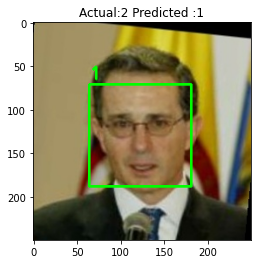

In [22]:
tags = ['0', '1', '2', '3', '4']
test_image = cv2.imread("/content/drive/MyDrive/dataset/test-data/1/Alvaro_Uribe_0021.jpg")
predicted_image, label = predict(test_image)

fig = plt.figure()
plt.title("Actual:"+ tags[2] + " Predicted :" + label )
imgplot = plt.imshow(cv2.cvtColor(predicted_image, cv2.COLOR_BGR2RGB))
plt.show()